In [1]:
import numpy as np
from sklearn.svm import SVC
import matplotlib.pyplot as plt
np.random.seed(42)

In [2]:
# plot predictions and decision boundary
# code taken from Question2 (adaboost) and modified
def plot_decision_boundary(X, y, clf, h=0.02):
    x_min, x_max = X[:, 0].min() - 0.5, X[:, 0].max() + 0.5
    y_min, y_max = X[:, 1].min() - 0.5, X[:, 1].max() + 0.5
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
    P = clf.predict(np.c_[xx.ravel(), yy.ravel()]).reshape(yy.shape)
    plt.pcolormesh(xx, yy, P, cmap=plt.cm.coolwarm, shading='auto')
    plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.coolwarm, edgecolor='k')
    plt.title("test-data with decision boundary")
    plt.xlabel("x-axis")
    plt.ylabel("y-axis")
    plt.show()

In [3]:
# lambda function that helps find the number of TP and TN
acc_score = lambda yp, y: np.sum(y == yp)/len(y)

In [4]:
# load all data using np.load
base_path = "./Question3"
data_train = np.load(f"{base_path}/Dataset_Kernel_Train.npy")
data_test = np.load(f"{base_path}/Dataset_Kernel_Test.npy")
# separate the target and features data
X_train, y_train = data_train[:, [0, 1]], data_train[:, 2]
X_test, y_test = data_test[:, [0, 1]], data_test[:, 2]

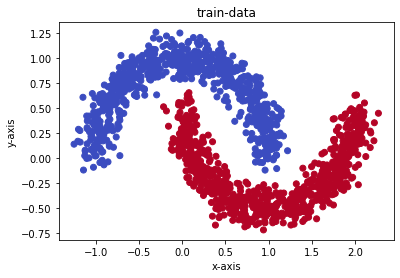

In [5]:
# make the scatter plot for the data
plt.scatter(X_train[:, 0], X_train[:, 1], c=y_train, cmap=plt.cm.coolwarm)
plt.title("train-data")
plt.xlabel("x-axis")
plt.ylabel("y-axis")
plt.show()

In [6]:
# # randomly shuffle the data and select an 80:20 split to use as train and validation
# # using validation data, find the best parameters for the model
# idxs = np.random.permutation(X_train.shape[0])
# split = int(len(idxs) * 0.8)
# xv, x = X_train[idxs][split: ], X_train[idxs][: split]
# yv, y = y_train[idxs][split: ], y_train[idxs][: split]
# best_acc, best_params = 0, []

# # the best parameters to tune for SVC-rbf are C, gamma and shrinking
# # for C, values greater than 1.0 will have too much regularization and hence were not used.
# for C in [0.001, 0.01, 0.1, 1]: 
#     for gamma in ["scale", "auto"]:
#         for shrinking in [True, False]:
#             test_clf = SVC(kernel="rbf", C=C, 
#                            gamma=gamma, 
#                            shrinking=shrinking)
#             test_clf.fit(x, y)
#             yp = test_clf.predict(xv)
#             curr_acc = acc_score(yp, yv)
#             if curr_acc > best_acc:
#                 best_acc = curr_acc
#                 best_params = [C, gamma, shrinking]

# print(f"{best_params} -> {best_acc}")

[1, 'scale', True] -> 1.0


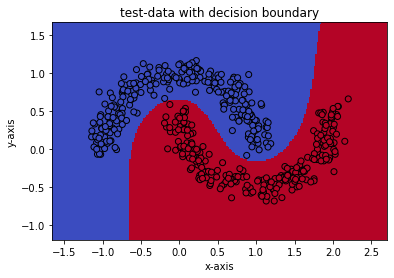

accuracy on test set:  1.000


In [7]:
# fit the SVM classifier with the best hyperparameters
# make predictions on the test data
# and plot the decision boundary
clf = SVC(kernel="rbf", C=1, 
          gamma="scale", 
          shrinking=True)
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
plot_decision_boundary(X_test, y_test, clf)
print(f"accuracy on test set: {acc_score(y_pred, y_test): .3f}")